In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
#If needed install kagglehub
#pip install kagglehub
#!pip install geopandas

In [3]:
# Download data

path = 'world_tourism_economy_data.csv'

Dataset Overview 📝
This dataset includes key tourism and economic indicators for over 200 countries, spanning the years from 1999 to 2023. It covers a wide range of data related to tourism arrivals, expenditures, receipts, GDP, unemployment, and inflation, helping to explore the relationship between tourism and economic growth globally.

The dataset consists of one CSV file named "world_tourism_economy_data.csv" with the following columns:

country: The name of the country for which the data is reported.
country_code: ISO country code 
year 📅: The year for which the data is reported (1999-2023).
tourism_receipts 💰: Income from international tourism (in current US dollars).
tourism_arrivals 🌍: Number of international tourists arriving in the country.
tourism_exports 📈: Share of exports derived from international tourism receipts (%).
tourism_departures ✈️: Number of residents traveling abroad for tourism.
tourism_expenditures 🛍️: Spending by international tourists (in current US dollars).
gdp 📊: Gross Domestic Product of the country (in current US dollars).
inflation 📉: Annual percentage change in the price level (inflation).
unemployment 👷‍♂️: Percentage of the labor force that is unemployed but actively seeking work


Provenance
Sources
This dataset was compiled using publicly available data from a global statistics organization, the World Bank.

Collection Methodology
The data spans from 1999 to 2023 and was collected through governmental reports, and surveys conducted by international agencies..

In [4]:
# Creating dataset
df = pd.read_csv(path)

# Take a look at the dataset structure
print('Dataset contains', df.shape[0], 'rows and', df.shape[1], 'columns')

# Take a look at the dataset
df.head()

Dataset contains 6650 rows and 11 columns


,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,NaN,7.760536,2.654293e+11,7.819865,NaN
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,NaN,6.147291,1.394683e+11,0.372266,NaN
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN


In [5]:
#Lets clean countries data from countries unions

country_codes3 = pd.read_excel('countries-codes.xlsx')

codes_list = country_codes3['ISO3 CODE'].tolist()

non_country_codes = []
for i in range(len(df)):
    if df.loc[i].at['country_code'] not in codes_list:
       non_country_codes.append(i)       
df.drop(non_country_codes, inplace = True)
print('Dataset contains', df.shape[0], 'rows and', df.shape[1], 'columns')
df.head()

Dataset contains 5275 rows and 11 columns


,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,782000000.0,972000.0,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,1999,31000000.0,45000.0,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN
5,Albania,ALB,1999,218000000.0,371000.0,55.969191,NaN,3.699007,3.212122e+09,0.389438,18.4
6,Andorra,AND,1999,NaN,9422000.0,NaN,NaN,NaN,1.240295e+09,NaN,NaN


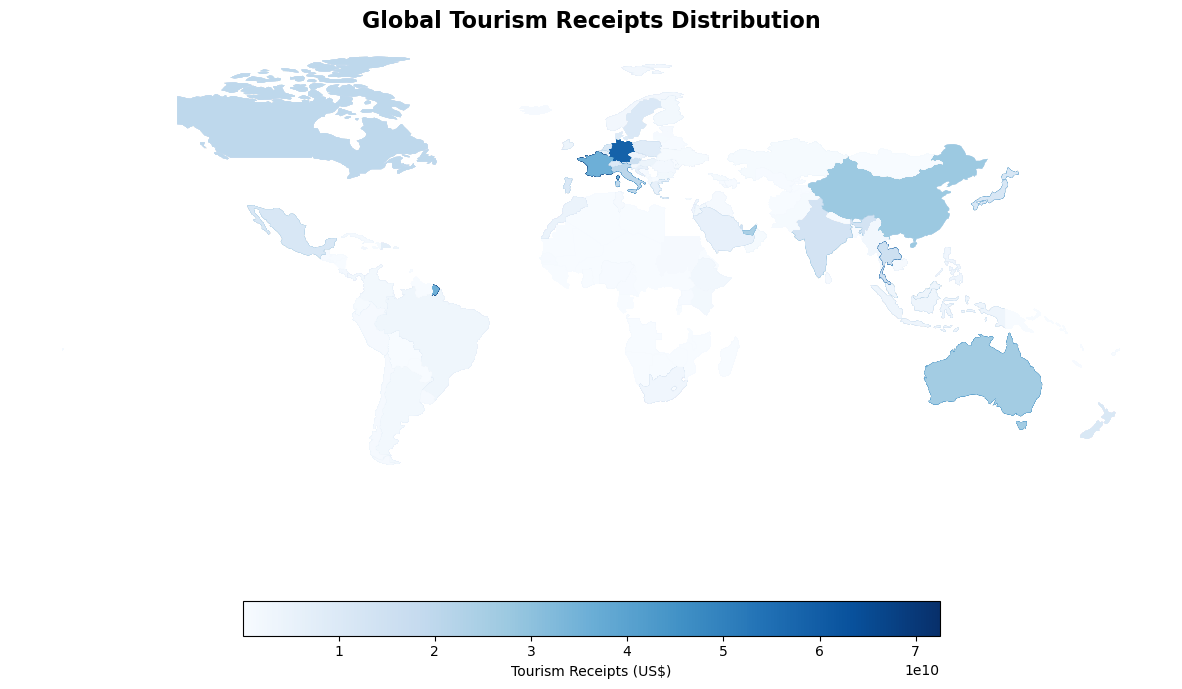

In [6]:
#Data visualization

import geopandas as gpd

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"


# Load world map and merge with tourism receipts data
world = gpd.read_file((url))
merged = world.set_index('ADMIN').join(df.set_index('country'))

# Plot the choropleth map using Seaborn's pastel colors
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='tourism_receipts', ax=ax, legend=True, cmap='Blues', 
            legend_kwds={'label': "Tourism Receipts (US$)", 'orientation': "horizontal", 'shrink': 0.6})

# Customize title and remove axis
plt.title('Global Tourism Receipts Distribution', fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()

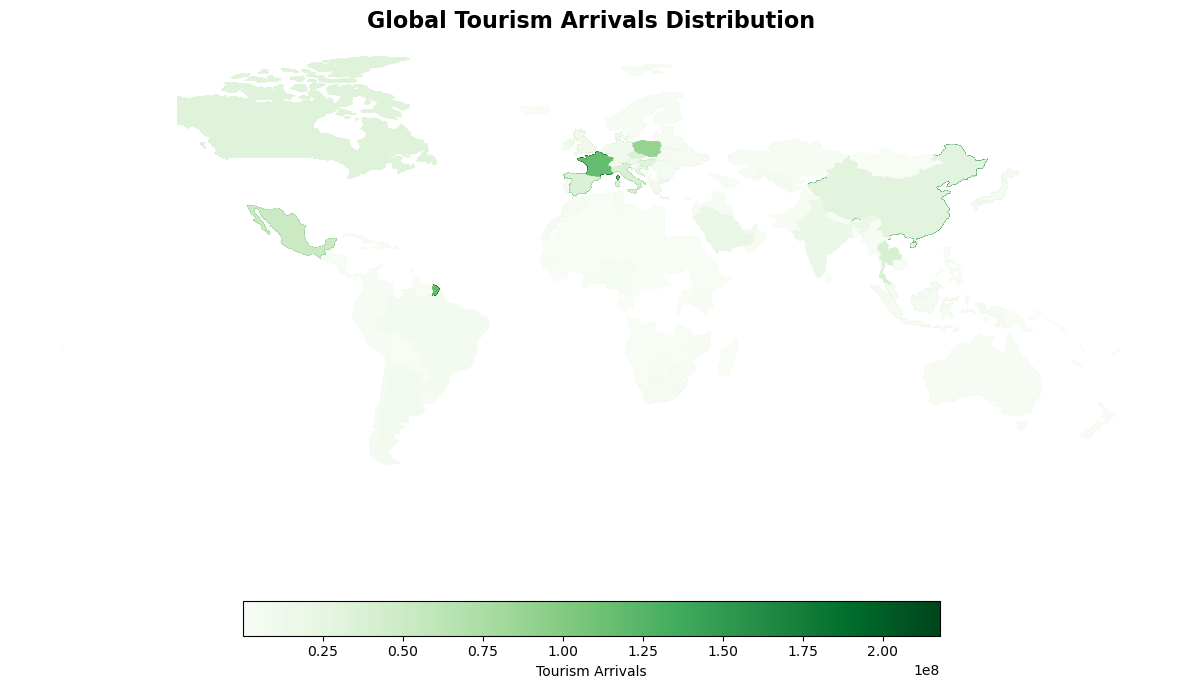

In [7]:
#Data visualization

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='tourism_arrivals', ax=ax, legend=True, cmap='Greens', 
            legend_kwds={'label': "Tourism Arrivals", 'orientation': "horizontal", 'shrink': 0.6})

# Customize title and remove axis
plt.title('Global Tourism Arrivals Distribution', fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()

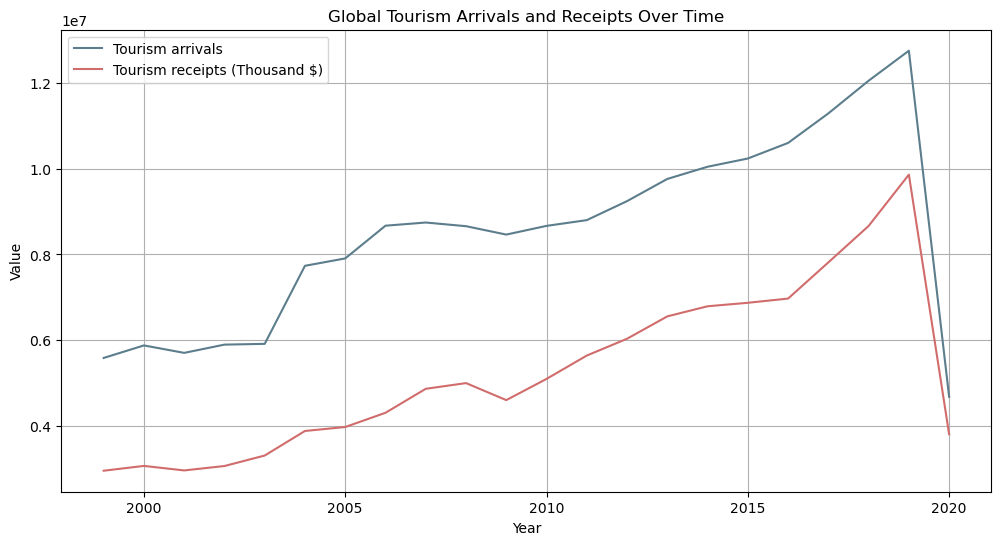

In [8]:
# Tourism Arrivals and Receipts over time (global average)
plt.figure(figsize=(12, 6))
global_arrivals = df.groupby('year')['tourism_arrivals'].mean()
global_receipts = df.groupby('year')['tourism_receipts'].mean()/1000

plt.plot(global_arrivals, label='Tourism arrivals', color='#5C7D8C')
plt.plot(global_receipts, label='Tourism receipts (Thousand $)', color='#D16C6C')
plt.title('Global Tourism Arrivals and Receipts Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
#Correlation analysys

#Drop non-numerical data to make correlation analysys between numerical data

df_num = df.drop(['country', 'country_code', 'year'], axis=1)
df_num.head()

,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,782000000.0,972000.0,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31000000.0,45000.0,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN
5,218000000.0,371000.0,55.969191,NaN,3.699007,3.212122e+09,0.389438,18.4
6,NaN,9422000.0,NaN,NaN,NaN,1.240295e+09,NaN,NaN


The Pearson Correlation measures the linear dependence between two variables X and Y.
The resulting coefficient is a value between -1 and 1 inclusive, where:
1: Perfect positive linear correlation.
0: No linear correlation, the two variables most likely do not affect each other.
-1: Perfect negative linear correlation.

In [10]:
#Check the Pearson Correlation

df_num.corr()

,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
tourism_receipts,1.000000,0.745800,-0.072833,0.703007,-0.042693,0.886662,-0.062691,-0.100637
tourism_arrivals,0.745800,1.000000,-0.108817,0.712167,-0.095516,0.626943,-0.057110,-0.025147
tourism_exports,-0.072833,-0.108817,1.000000,-0.222374,0.289688,-0.117104,-0.074813,0.163900
tourism_departures,0.703007,0.712167,-0.222374,1.000000,-0.075351,0.692447,-0.065001,-0.096766
tourism_expenditures,-0.042693,-0.095516,0.289688,-0.075351,1.000000,-0.041333,-0.034968,-0.001072
gdp,0.886662,0.626943,-0.117104,0.692447,-0.041333,1.000000,-0.039994,-0.083074
inflation,-0.062691,-0.057110,-0.074813,-0.065001,-0.034968,-0.039994,1.000000,-0.021965
unemployment,-0.100637,-0.025147,0.163900,-0.096766,-0.001072,-0.083074,-0.021965,1.000000


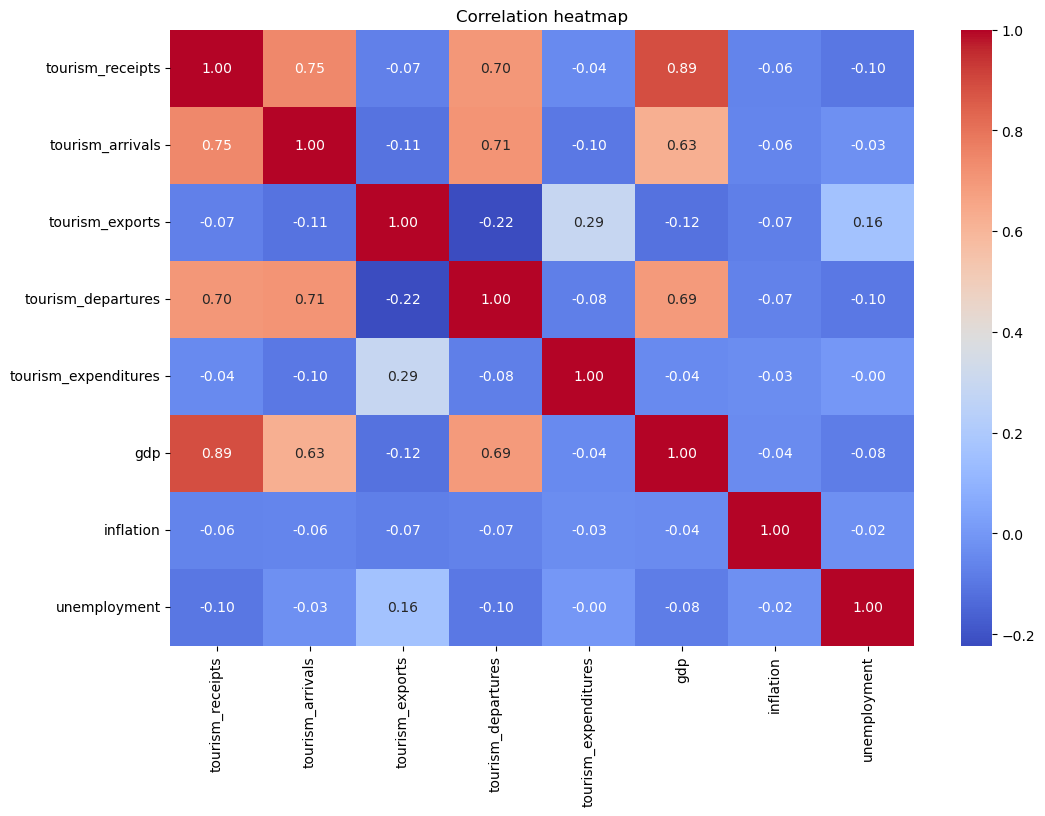

In [11]:
# Visualize correlation with the heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

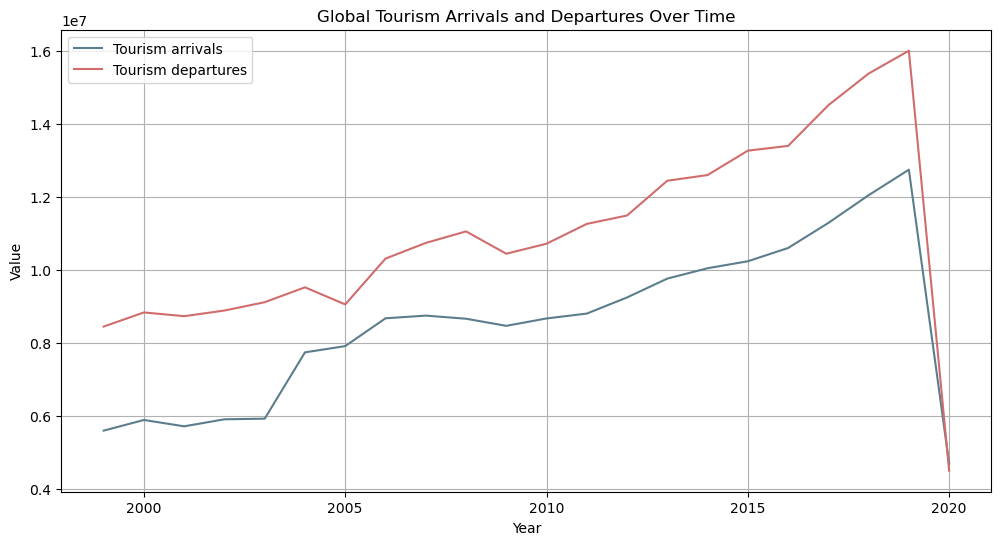

In [12]:
# Tourism Arrivals and Receipts over time (global average)
plt.figure(figsize=(12, 6))
global_arrivals = df.groupby('year')['tourism_arrivals'].mean()
global_receipts = df.groupby('year')['tourism_departures'].mean()

plt.plot(global_arrivals, label='Tourism arrivals', color='#5C7D8C')
plt.plot(global_receipts, label='Tourism departures', color='#D16C6C')
plt.title('Global Tourism Arrivals and Departures Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

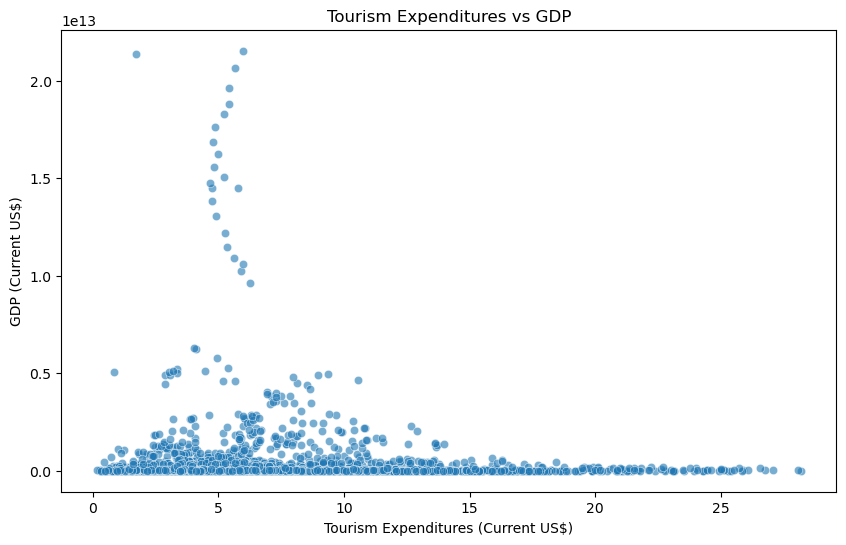

In [13]:
#Lets visualize the most important columns

# Scatter plot of Tourism Expenditures vs GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tourism_expenditures', y='gdp', data=df_num, alpha=0.6)
plt.title('Tourism Expenditures vs GDP')
plt.xlabel('Tourism Expenditures (Current US$)')
plt.ylabel('GDP (Current US$)')
plt.show()

In [14]:
#Check number of NAN values

nan_count = df_num.isna().sum()

print(nan_count)

tourism_receipts        1749
tourism_arrivals        1338
tourism_exports         2019
tourism_departures      3227
tourism_expenditures    1990
gdp                      159
inflation                880
unemployment            2237
dtype: int64


#Replace NAN with median values for every column and recheck NAN count - First option for data cleaning, 
#but not good for data quality

df['tourism_receipts'].fillna(df['tourism_receipts'].median(), inplace=True)
df['tourism_arrivals'].fillna(df['tourism_arrivals'].median(), inplace=True)
df['tourism_exports'].fillna(df['tourism_exports'].median(), inplace=True)
df['tourism_departures'].fillna(df['tourism_departures'].median(), inplace=True)
df['tourism_expenditures'].fillna(df['tourism_expenditures'].median(), inplace=True)
df['gdp'].fillna(df['gdp'].median(), inplace=True)
df['inflation'].fillna(df['inflation'].median(), inplace=True)
df['unemployment'].fillna(df['unemployment'].median(), inplace=True)

nan_count = df.isna().sum()

print(nan_count)

In [15]:
#Delete rows with NAN values and recheck NAN count - better option for data cleaning
#First lets delete the columns with low correlation coefficients for model building, then rows with NAN values

df_num.drop(['tourism_exports', 'tourism_expenditures', 'inflation', 'unemployment'], axis = 1, inplace = True)

df_num.dropna(inplace=True)

nan_count = df_num.isna().sum()

print(nan_count)

print('Dataset contains', df_num.shape[0], 'rows and', df_num.shape[1], 'columns')

tourism_receipts      0
tourism_arrivals      0
tourism_departures    0
gdp                   0
dtype: int64
Dataset contains 1690 rows and 4 columns


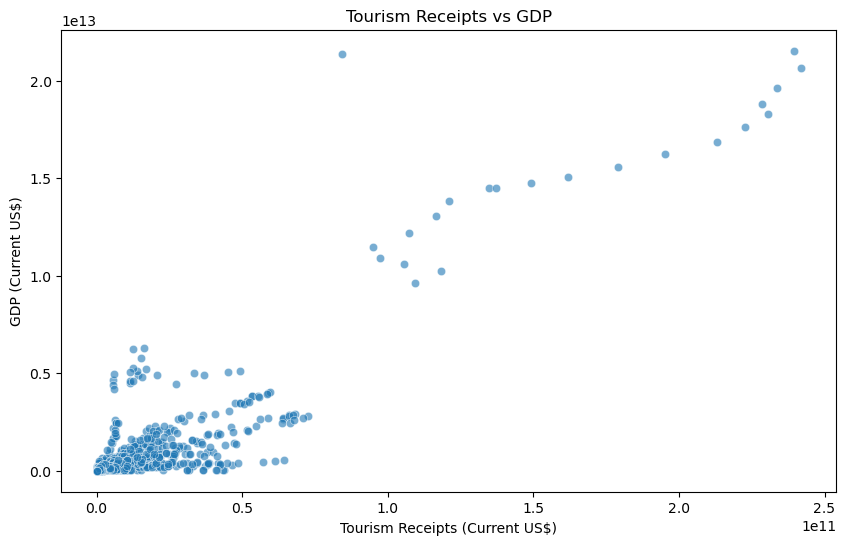

In [16]:
#Lets visualize the most important columns

# Scatter plot of Tourism Receipts vs GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tourism_receipts', y='gdp', data=df_num, alpha=0.6)
plt.title('Tourism Receipts vs GDP')
plt.xlabel('Tourism Receipts (Current US$)')
plt.ylabel('GDP (Current US$)')
plt.show()

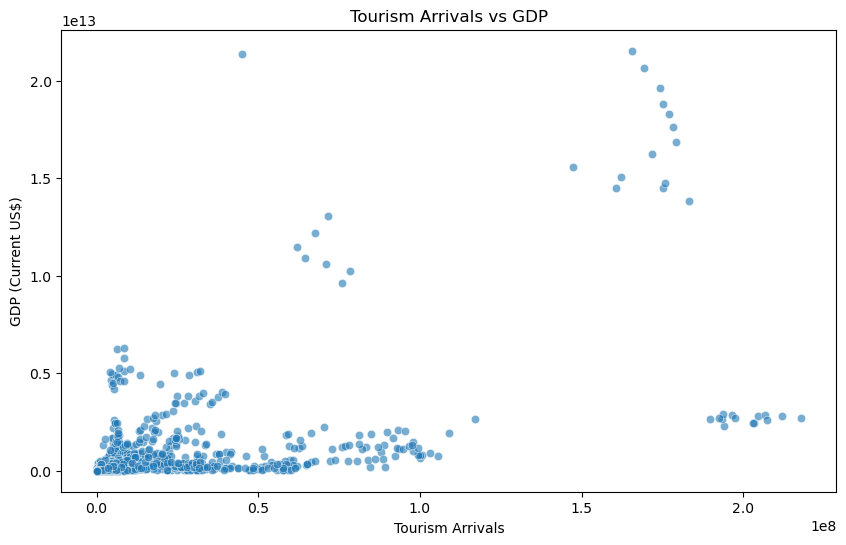

In [17]:
#Lets visualize the most important columns

# Scatter plot of Tourism Arrivals vs GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tourism_arrivals', y='gdp', data=df_num, alpha=0.6)
plt.title('Tourism Arrivals vs GDP')
plt.xlabel('Tourism Arrivals')
plt.ylabel('GDP (Current US$)')
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 


In [18]:
msk = np.random.rand(len(df_num)) < 0.8
train = df_num[msk]
test = df_num[~msk]

In [19]:
test.head()

,tourism_receipts,tourism_arrivals,tourism_departures,gdp
16,1.200000e+06,26000.0,27000.0,8.080772e+08
50,1.901000e+09,1603000.0,97000.0,2.836462e+10
80,1.430000e+08,262000.0,187000.0,4.662992e+09
101,3.622000e+09,28803000.0,10622000.0,4.907338e+10
111,3.403000e+09,6403000.0,3576000.0,9.889396e+10


In [20]:
#Lets create linear model for GDP vs Tourism Arrivals

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['tourism_arrivals']])
train_y = np.asanyarray(train[['gdp']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[37131.96366022]]
Intercept:  [5.41232374e+10]


Text(0, 0.5, 'GDP (Current US$)')

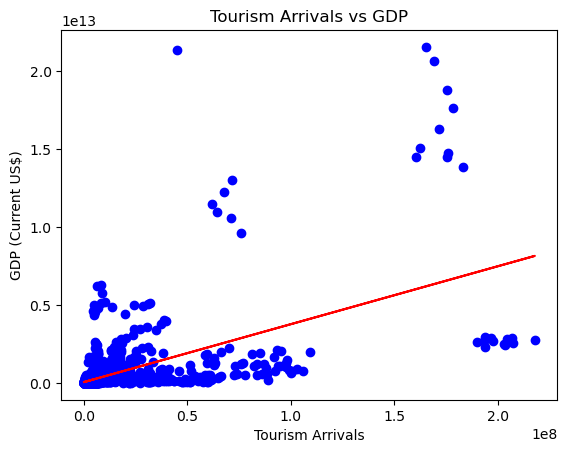

In [21]:
plt.scatter(train.tourism_arrivals, train.gdp,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.title('Tourism Arrivals vs GDP')
plt.xlabel('Tourism Arrivals')
plt.ylabel('GDP (Current US$)')

#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [22]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['tourism_arrivals']])
test_y = np.asanyarray(test[['gdp']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

Mean absolute error: 615057008299.22
Residual sum of squares (MSE): 2512874194412190228807680.00
R2-score: 0.41


In [23]:
##Lets create linear model for GDP vs Tourism Receipts

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['tourism_receipts']])
train_y = np.asanyarray(train[['gdp']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[80.56721709]]
Intercept:  [-1.71167597e+11]


Text(0, 0.5, 'GDP (Current US$)')

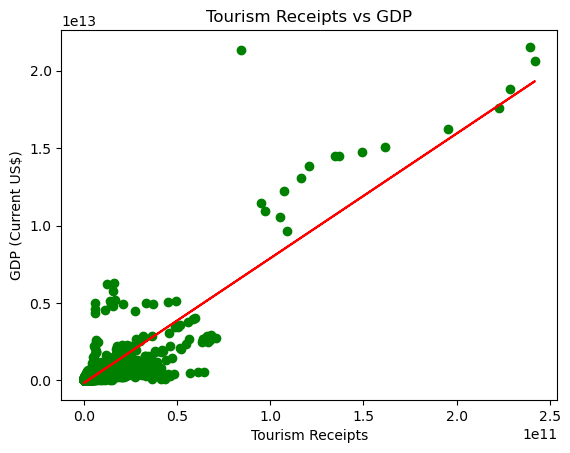

In [24]:
plt.scatter(train.tourism_receipts, train.gdp,  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.title('Tourism Receipts vs GDP')
plt.xlabel('Tourism Receipts')
plt.ylabel('GDP (Current US$)')

In [25]:
test_x = np.asanyarray(test[['tourism_receipts']])
test_y = np.asanyarray(test[['gdp']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 392755182095.49
Residual sum of squares (MSE): 618323955977839332818944.00
R2-score: 0.85


The Linear model shows a good performance of regression model for Tourism Receipts vs GDP (R2-score 0.79) and not so good performance of regression model for Tourism Arrivals vs GDP (R2-score: 0.35).

###Lets create the countries segmentation with K-Means model

Lets apply the segmentation with K-Means model on this historical data.Ssegmentation is the practice of partitioningobjectse into groups of individuals that have similar characteristics..

In [26]:
# Re-read data and create dataset
dfk = pd.read_csv(path)

# Take a look at the dataset before NAN deletion
print('Full dataset contains', dfk.shape[0], 'rows and', dfk.shape[1], 'columns')

#Lets clean countries data from countries unions
     
dfk.drop(non_country_codes, inplace = True)
print('Dataset contains', dfk.shape[0], 'rows and', dfk.shape[1], 'columns for only countries')
dfk.head()

#Delete rows with NAN values and recheck NAN count - better option for data cleaning
#First lets delete the columns with low correlation coefficients for model building, then rows with NAN values

dfk_nonan = dfk.drop(['tourism_exports', 'tourism_expenditures', 'inflation', 'unemployment'], axis = 1)

dfk_nonan.dropna(inplace=True)

nan_count = dfk_nonan.isna().sum()

print(nan_count)

dfk_num = dfk_nonan.drop(['country', 'country_code', 'year'], axis = 1)

print('After the NAN deletion dataset contains', dfk_num.shape[0], 'rows and', dfk_num.shape[1], 'columns')
dfk_num.head()

Full dataset contains 6650 rows and 11 columns
Dataset contains 5275 rows and 11 columns for only countries
country               0
country_code          0
year                  0
tourism_receipts      0
tourism_arrivals      0
tourism_departures    0
gdp                   0
dtype: int64
After the NAN deletion dataset contains 1690 rows and 4 columns


,tourism_receipts,tourism_arrivals,tourism_departures,gdp
13,1.140800e+10,4459000.0,3210000.0,3.896522e+11
15,9.300000e+07,602000.0,1204000.0,4.581249e+09
16,1.200000e+06,26000.0,27000.0,8.080772e+08
21,1.184000e+09,5056000.0,2376000.0,1.362733e+10
28,1.240000e+08,342000.0,253000.0,8.285064e+09


#### Normalizing over the standard deviation
Now let's normalize the dataset. Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.

In [27]:
#df.values returns a numpy array with the underlying data of the DataFrame, without any index or columns names.
#[:, 1:] is a slice of that array, that returns all rows and every column starting from the second column. (the first column is index 0)

from sklearn.preprocessing import StandardScaler
X = dfk_num.values[:,:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.09949136, -0.317039  , -0.33338738, -0.08987448],
       [-0.42422176, -0.45101515, -0.4220199 , -0.29094145],
       [-0.42847071, -0.471023  , -0.47402413, -0.29291163],
       ...,
       [ 3.46888984,  1.0924721 ,  2.20010212, 10.85683255],
       [-0.42542516, -0.4690639 , -0.47480176, -0.29285871],
       [-0.42745892, -0.47109594, -0.47439969, -0.29287987]])

In [28]:
from sklearn.cluster import KMeans 

k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [29]:
k_means.fit(X)
labels = k_means.labels_
print(labels)

C:\Users\tprymak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[0 0 0 ... 1 0 0]


In [30]:
dfk_num["Clus_km"] = labels
dfk_num.head(5)

,tourism_receipts,tourism_arrivals,tourism_departures,gdp,Clus_km
13,1.140800e+10,4459000.0,3210000.0,3.896522e+11,0
15,9.300000e+07,602000.0,1204000.0,4.581249e+09,0
16,1.200000e+06,26000.0,27000.0,8.080772e+08,0
21,1.184000e+09,5056000.0,2376000.0,1.362733e+10,0
28,1.240000e+08,342000.0,253000.0,8.285064e+09,0


In [31]:
X[0:5,0:5]

array([[1.14080000e+10, 4.45900000e+06, 3.21000000e+06, 3.89652212e+11],
       [9.30000000e+07, 6.02000000e+05, 1.20400000e+06, 4.58124857e+09],
       [1.20000005e+06, 2.60000000e+04, 2.70000000e+04, 8.08077223e+08],
       [1.18400000e+09, 5.05600000e+06, 2.37600000e+06, 1.36273255e+10],
       [1.24000000e+08, 3.42000000e+05, 2.53000000e+05, 8.28506443e+09]])

In [32]:
#We can easily check the centroid values by averaging the features in each cluster.

dfk_num.groupby('Clus_km').mean()

,tourism_receipts,tourism_arrivals,tourism_departures,gdp
Clus_km,,,,
0,5.661210e+09,9.505001e+06,7.438114e+06,1.953522e+11
1,2.099423e+11,1.595010e+08,1.296507e+08,1.900060e+13
2,3.196062e+10,5.044397e+07,3.919882e+07,3.001754e+12
3,1.255285e+11,1.149965e+08,1.048878e+08,1.279173e+13


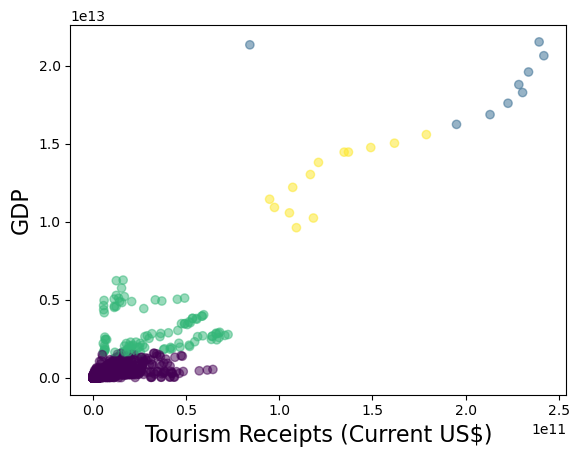

In [33]:
#Now, let's look at the distribution of countries based on their Tourism Receipts and GDP:

#c = array-like or list of color or color, optional. The marker colors labels = k_means.labels_([0,1,2]). 
plt.scatter(X[:, 0], X[:, 3], c=labels.astype(np.double), alpha=0.5)
plt.xlabel('Tourism Receipts (Current US$)', fontsize=16)
plt.ylabel('GDP', fontsize=16)

plt.show()

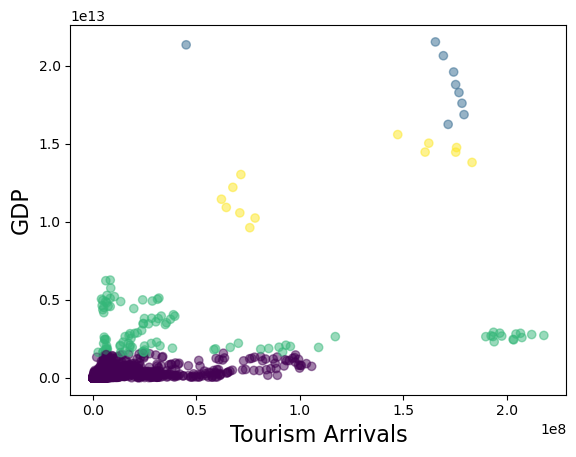

In [34]:
#Now, let's look at the distribution of countries based on their Tourism Arrivals and GDP:

#c = array-like or list of color or color, optional. The marker colors labels = k_means.labels_([0,1,2]). 
plt.scatter(X[:, 1], X[:, 3], c=labels.astype(np.double), alpha=0.5)
plt.xlabel('Tourism Arrivals', fontsize=16)
plt.ylabel('GDP', fontsize=16)

plt.show()

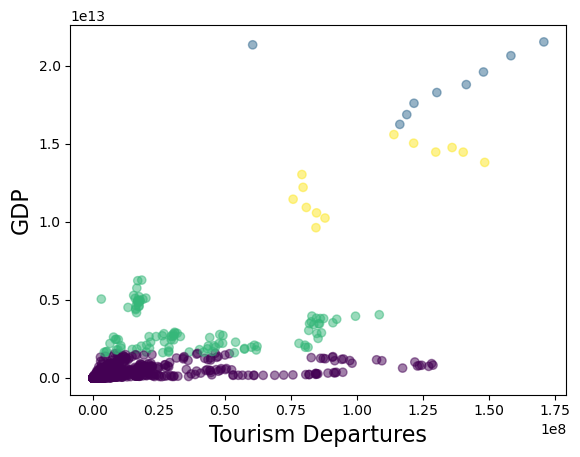

In [35]:
#Now, let's look at the distribution of countries based on their Tourism Departures and GDP:

#c = array-like or list of color or color, optional. The marker colors labels = k_means.labels_([0,1,2]). 
plt.scatter(X[:, 2], X[:, 3], c=labels.astype(np.double), alpha=0.5)
plt.xlabel('Tourism Departures', fontsize=16)
plt.ylabel('GDP', fontsize=16)

plt.show()

In [ ]:
To be continued ;)